In [2]:
import numpy as np
import struct
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import pandas as pd

# Read in the Training Images/Labels

In [5]:
def read_idx3(fp):
    with open(fp, 'rb') as f:
        magic_number, num_images, num_rows, num_cols = struct.unpack('>IIII', f.read(16))
        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, num_rows, num_cols)
        return images

In [6]:
def read_idx1(fp):
    with open(fp, 'rb') as f:
        magic_number, num_labels = struct.unpack('>II', f.read(8))
        labels = np.frombuffer(f.read(), dtype=np.uint8)
        return labels

In [7]:
train_images = read_idx3('data/train-images.idx3-ubyte')
train_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
train_labels = read_idx1('data/train-labels.idx1-ubyte')
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

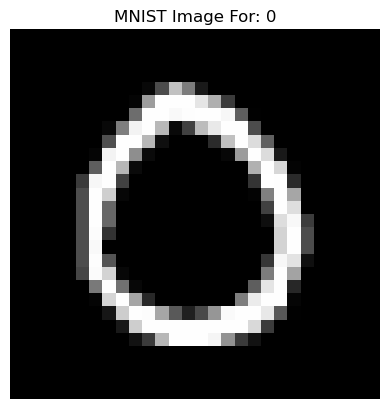

In [10]:
plt.imshow(train_images[2340], cmap='gray')
plt.title(f'MNIST Image For: {train_labels[2340]}')
plt.axis('off')
plt.show()

In [11]:
test_images = read_idx3('data/t10k-images.idx3-ubyte')
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
test_images.shape

(10000, 28, 28)

In [13]:
test_labels = read_idx1('data/t10k-labels.idx1-ubyte')
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

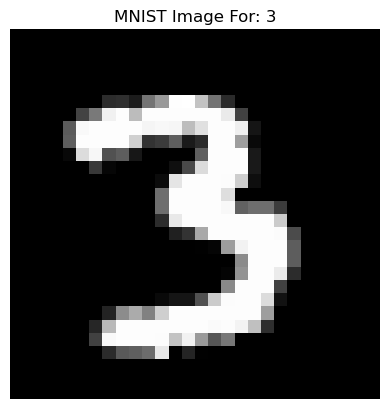

In [14]:
plt.imshow(test_images[500], cmap='gray')
plt.title(f'MNIST Image For: {test_labels[500]}')
plt.axis('off')
plt.show()

# 1 Nearest Neighbors

## Random Sampling

Base Structure

In [15]:
distances = np.array([np.linalg.norm(train_images[i] - test_images[0]) for i in np.arange(train_images.shape[0])])
nearest_image = np.argmin(distances)
train_labels[nearest_image]

7

Unefficient $O(n \cdot m^2)$ ~ 15 min

In [28]:
accuracy_scores = []
num_subsets = np.array([10000, 5000, 1000])
for k in num_subsets:
    train_subset = np.random.choice(train_images.shape[0], size=k, replace=False)
    prototype_images = train_images[train_subset]
    prototype_labels = train_labels[train_subset]
    predicted_labels = []
    for j in np.arange(test_images.shape[0]):
        distances = np.array([np.linalg.norm(prototype_images[i] - test_images[j]) for i in np.arange(prototype_images.shape[0])])
        nearest_image = np.argmin(distances)
        predicted_labels.append(prototype_labels[nearest_image])
    accuracy_scores.append(np.mean(predicted_labels == test_labels))

Optimized $O(n \cdot m)$

In [17]:
accuracy_scores = []
    
# Define subset sizes
num_subsets = np.array([10000, 5000, 1000])

# Set random seed for reproducibility
np.random.seed(42)

# Perform classification for different subset sizes
for k in num_subsets:
    # Efficient subset selection using numpy random choice
    train_subset = np.random.choice(train_images.shape[0], size=k, replace=False)
    
    # Select prototype images and labels
    prototype_images = train_images[train_subset]
    prototype_labels = train_labels[train_subset]
    
    # Reshape images to 2D arrays
    prototype_images_reshaped = prototype_images.reshape(prototype_images.shape[0], -1)
    test_images_reshaped = test_images.reshape(test_images.shape[0], -1)
    
    # Use scipy's cdist for vectorized distance calculation
    
    # Compute distances between all test images and prototype images
    distances = cdist(test_images_reshaped, prototype_images_reshaped)
    
    # Find the index of the nearest prototype for each test image
    nearest_indices = np.argmin(distances, axis=1)
    
    # Predict labels based on nearest prototype
    predicted_labels = prototype_labels[nearest_indices]
    
    # Calculate accuracy for this subset
    accuracy = np.mean(predicted_labels == test_labels)
    accuracy_scores.append(accuracy)

In [23]:
accuracy_scores = np.array(accuracy_scores)
accuracy_scores

array([0.9477, 0.936 , 0.8821])

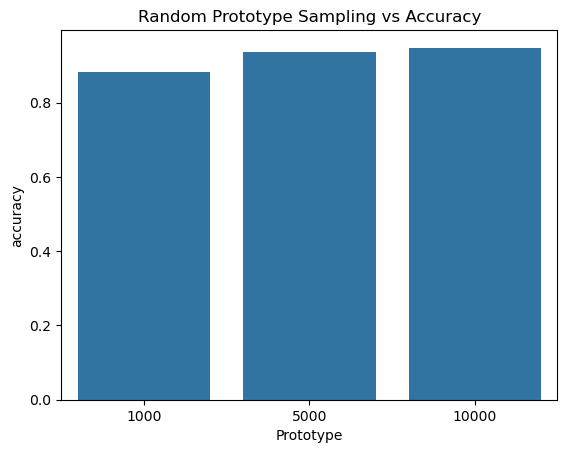

In [30]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({
    'Prototype': num_subsets,
    'accuracy': accuracy_scores
})
sns.barplot(x='Prototype', y='accuracy', data = df)
plt.title('Random Prototype Sampling vs Accuracy')
plt.show()